# Color-magnitude diagram: narrowband filters

In this tutorial, we will compute synthetic photometry for the narrowband H2 and H3 filters of VLT/SPHERE. We will use empirical data from the [SpeX Prism Spectral Library](http://pono.ucsd.edu/~adam/browndwarfs/spexprism/index_old.html) and theoretical isochrones and spectra from the AMES-Cond and AMES-Dusty models. The synthetic colors and magnitudes are compared with the photometric data of directly imaged companions in a color-magnitude diagram.

## Getting started

We start by importing the required Python modules.

In [1]:
import numpy as np
import species

Next, we initiate the *species* workflow with `SpeciesInit`. This will create the configuration file with default values and the HDF5 database.

In [2]:
species.SpeciesInit()

Initiating species v0.5.1... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


Later on, we will interpolate the isochrone data at an age of 20 Myr for 100 logarithmically-spaced masses between 1 M<sub>Jup</sub> and 1000 M<sub>Jup</sub>.

In [3]:
age = 20.  # (Myr)
masses = np.logspace(0., 3., 100)  # (Mjup)

## Adding data and models

We will now add the required data to the database by first creating an instance of `Database`.

In [4]:
database = species.Database()

The [photometric data of directly imaged companions](https://github.com/tomasstolker/species/blob/master/species/data/companions.py) that are available in *species* is added by using the `add_companion` method with `name=None`. Alternative, `add_object` can be used to manually add photometric and spectroscopic data of an individual object.

In [5]:
database.add_companion(name=None, verbose=False)

Adding Vega spectrum... [DONE]
Adding object: beta Pic b [DONE]


/Users/tomasstolker/applications/species/species/data/database.py:991: UserWarning: Found 33 fluxes with NaN in the data of GPI_YJHK. Removing the spectral fluxes that contain a NaN.
  warnings.warn(


Adding object: beta Pic c [DONE]
Adding object: HIP 65426 b [DONE]
Adding object: 51 Eri b [DONE]


/Users/tomasstolker/applications/species/species/data/filters.py:214: UserWarning: The minimum transmission value of Subaru/CIAO.z is smaller than zero (-1.80e-03). Wavelengths with negative transmission values will be removed.
  warnings.warn(


Adding object: HR 8799 b [DONE]
Adding object: HR 8799 c [DONE]
Adding object: HR 8799 d [DONE]
Adding object: HR 8799 e [DONE]
Adding object: HD 95086 b [DONE]
Adding object: PDS 70 b [DONE]
Adding object: PDS 70 c [DONE]
Adding object: 2M 1207 B [DONE]
Adding object: AB Pic B [DONE]
Adding object: HD 206893 B [DONE]
Adding object: RZ Psc B [DONE]
Adding object: GQ Lup B [DONE]
Adding object: PZ Tel B [DONE]
Adding object: kappa And b [DONE]
Adding object: HD 1160 B [DONE]
Adding object: ROXs 12 B [DONE]
Adding object: ROXs 42 Bb [DONE]
Adding object: GJ 504 b [DONE]
Adding object: GU Psc b [DONE]
Adding object: 2M0103 ABb [DONE]
Adding object: 1RXS 1609 B [DONE]
Adding object: GSC 06214 B [DONE]
Adding object: HD 72946 B [DONE]
Adding object: HIP 64892 B [DONE]
Adding object: HD 13724 B [DONE]
Adding object: TYC 8988 B [DONE]
Adding object: TYC 8988 C [DONE]
Adding object: HD 142527 B [DONE]
Adding object: CS Cha B [DONE]
Adding object: CT Cha B [DONE]
Adding object: SR 12 C [DONE]
A

The spectra from the SpeX Prism Spectral Library are also downloaded and added to the database. For each spectrum, the [SIMBAD Astronomical Database](http://simbad.u-strasbg.fr/simbad/) is queried for the SIMBAD identifier. The identifier is then used to extract the [distance](https://home.strw.leidenuniv.nl/~stolker/species/distance.dat) of the object (calculated from the parallax). A NaN value is stored for the distance if the object could not be identified in the SIMBAD database so these objects are not used in the color-magnitude diagram.

In [6]:
database.add_spectra('spex')

Adding filter: 2MASS/2MASS.H... [DONE]
Adding spectra... 2MASS J04414825+2534304                               

/Users/tomasstolker/.pyenv/versions/3.10.0/envs/species3.10/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J21225635+3656002
  warnings.warn("Warning: The script line number %i raised "


Adding spectra... 2MASS J04035944+1520502                               

/Users/tomasstolker/.pyenv/versions/3.10.0/envs/species3.10/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J14044941-3159329
  warnings.warn("Warning: The script line number %i raised "


Adding spectra... 2MASS J05103520-4208140                               

/Users/tomasstolker/.pyenv/versions/3.10.0/envs/species3.10/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J05103520-4208140
  warnings.warn("Warning: The script line number %i raised "


Adding spectra... 2MASS J21321145+1341584                               

/Users/tomasstolker/.pyenv/versions/3.10.0/envs/species3.10/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J14162394+1348363
  warnings.warn("Warning: The script line number %i raised "


Adding spectra... [DONE]                                                


The AMES-Cond model spectra (i.e. for cloudless atmospheres) are also downloaded and imported into the database.

In [7]:
database.add_model('ames-cond')

Unpacking AMES-Cond model spectra (150 MB)... [DONE]
Wavelength range (um) = 0.5 - 40
Spectral resolution = 4000
Teff range (K) = 100 - 6600
Adding AMES-Cond model spectra... [DONE]                               
Grid points stored in the database:
   - Teff = [ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400.
 2500. 2600. 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600.
 3700. 3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800.
 5000. 5100. 5200. 5300. 5400. 5500. 5600. 5700. 5800. 5900. 6000. 6100.
 6200. 6300. 6400. 6500. 6600.]
   - log(g) = [2.5 3.  3.5 4.  4.5 5.  5.5]


And also the AMES-Dusty model spectra (i.e. for dusty atmospheres) are downloaded and imported into the database.

In [8]:
database.add_model('ames-dusty')

Unpacking AMES-Dusty model spectra (59 MB)... [DONE]
Wavelength range (um) = 0.5 - 40
Spectral resolution = 4000
Teff range (K) = 500 - 4000
Adding AMES-Dusty model spectra... [DONE]                                
Grid points stored in the database:
   - Teff = [ 500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600.
 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800.
 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000.]
   - log(g) = [3.5 4.  4.5 5.  5.5 6. ]


Next, we add the isochrones from AMES-Cond and AMES-Dusty, which have been retrieved from https://phoenix.ens-lyon.fr/Grids/.

In [9]:
database.add_isochrones('ames')

Adding isochrones: ames-cond... [DONE]
Database tag: ames-cond
Adding isochrones: ames-dusty... [DONE]
Database tag: ames-dusty


## Synthetic colors and magnitudes

For the narrowband filters of SPHERE, the synthetic colors and magnitudes are computed from the SpeX spectra. We start by creating an instance of `ReadColorMagnitude`.

In [10]:
read_color = species.ReadColorMagnitude(library='spex',
                                        filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                        filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

All spectra are used and the colors and magnitudes are stored in a `ColorMagObject`.

In [11]:
colorbox = read_color.get_color_magnitude(object_type=None)

/Users/tomasstolker/applications/species/species/analysis/photometry.py:251: UserWarning: Spectum contains NaN so can not calculate the error.
  warnings.warn("Spectum contains NaN so can not calculate the error.")
/Users/tomasstolker/applications/species/species/analysis/photometry.py:327: UserWarning: Spectum contains NaN so can not calculate the error.
  warnings.warn("Spectum contains NaN so can not calculate the error.")


Next, the isochrone data is extracted by first creating and instance of `ReadIsochrone`.

In [12]:
read_iso_cond = species.ReadIsochrone(tag='ames-cond')
read_iso_dusty = species.ReadIsochrone(tag='ames-dusty')

To interpolate the isochrones and compute synthetic photometry, we use the `get_color_magnitude` method and give the grid of model spectra (i.e. that was stored with `add_model`) as argument of `model`. The method will return a `ColorMagBox` object.

In [13]:
modelcolor1 = read_iso_cond.get_color_magnitude(age=age,
                                                masses=masses,
                                                model='ames-cond',
                                                filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                                filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

ames-cond baraffe


In [14]:
modelcolor2 = read_iso_dusty.get_color_magnitude(age=age,
                                                 masses=masses,
                                                 model='ames-dusty',
                                                 filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                                 filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

ames-dusty baraffe


/Users/tomasstolker/applications/species/species/read/read_isochrone.py:288: UserWarning: The value of logg is 2.917784581524866, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 501.3728693602355, 'logg': 2.917784581524866, 'mass': 1.0, 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:288: UserWarning: The value of logg is 2.972779343287681, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 502.51561905255875, 'logg': 2.972779343287681, 'mass': 1.0722672220103233, 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:288: UserWarning: The value of logg is 3.035244115774989, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 504.9110749

Some warnings are printed for temperatures (i.e. masses) that are outside the grid of isochrone data and also when the log(g) from the isochrone data is outside the log(g) range of the grid with model spectra. In those case, the magnitudes and colors are set to NaN and will be ignored in the color-magnitude diagram.

## Selecting directly imaged planets

We will also create a list with names of directly imaged planets and the filters for the magnitudes and colors that we want to plot. To get and overview of the available data in the database, it is possible to use the `list_companions` method of the `Database` object.

In this case, we select a few of these directly imaged planets and brown dwarfs for which SPHERE H2 and H3 photometry are available in the database. For each companion, a tuple needs to be provided with the name (as used in the database), the filter names for the color, and the filter name for the magnitude.

In [15]:
objects = [('HIP 65426 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('HR 8799 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('HR 8799 d', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('PZ Tel B', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2')]

## Plotting a color-magnitude diagram

Finally, we will create the color-magnitude diagram by providing the `ColorMagBox` objects as list to the `boxes` parameter of `plot_color_magnitude`. Further details on the various parameters of this function can be found in the [API documentation](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude).

In [21]:
species.plot_color_magnitude(boxes=[colorbox, modelcolor1, modelcolor2],
                             objects=objects,
                             mass_labels=[(3., 'left'), (5., 'left'), (10., 'left'), (20., 'right'), (50., 'right'), (100., 'right')],
                             companion_labels=True,
                             field_range=('late M', 'late T'),
                             label_x=r'H2 $-$ H3',
                             label_y=r'M$_\mathregular{H2}$',
                             xlim=(-2.7, 1.8),
                             ylim=(17.3, 7),
                             offset=(-0.07, -0.1),
                             legend=(0.08, 0.8),
                             output='color_mag.png')

Plotting color-magnitude diagram: color_mag.png... [DONE]


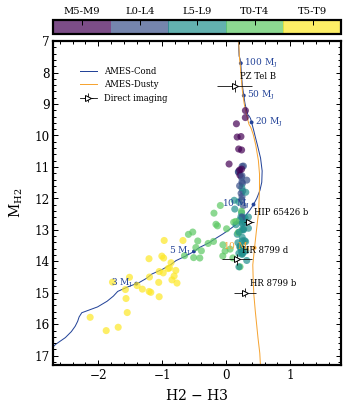

In [21]:
from IPython.display import Image
Image('color_mag.png') 